In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
#sc.logging.print_header()
file_path = '/work/users/mh823zote/projects/gating/data/CITEseq_Covid/' 
data_dir = file_path + 'data/' 
adata = sc.read_h5ad(data_dir + 'pdata_CD16_CD4_sub_denoised.h5ad')

# CITEseq

In [2]:
AB_citeseq_orig = list(adata.var.index)
AB_citeseq = list(adata.var.index)
prefix_to_remove = 'AB_'
for i in range(len(AB_citeseq)):
    if AB_citeseq[i].startswith(prefix_to_remove):
        AB_citeseq[i] = AB_citeseq[i][len(prefix_to_remove):]

# CyTOF 

In [3]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import datetime
import os
import re

def get_subsample_fraction(adata,cluster_string,target_cluster,subsample_factor):
    adata_target = adata[adata.obs[cluster_string] == target_cluster]
    adata_rest = adata[adata.obs[cluster_string] != target_cluster]
    sc.pp.subsample(adata_rest,n_obs = 15*len(adata_target))
    adata_sub = adata_rest.concatenate(adata_target)
    return adata_sub

sc.logging.print_versions()
sc.settings.verbosity = 3 
now = datetime.datetime.now()
today = now.strftime("%Y%m%d")

df_anno = pd.read_csv('/work/users/mh823zote/projects/gating/data/covid/data_Tcells_annotated.csv')
var_names = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']
adata_anno = ann.AnnData(X=df_anno[var_names], obs= df_anno[['cellid', 'Run', 'FCS.Filename', 'id', 'Individuals', 'Group',
       'Severity', 'Disease.phase', 'max. WHO scale', 'sev_merge',
       'Days.post.symptom.onset', 'Week', 'sev_week', 'followup', 'Tcellcompartment',
       'pheno_acute', 'metacluster_num', 'metacluster_name', 'new_clust_name',
       'new_clust_num']]) 

df_umap = df_anno[['UMAP1', 'UMAP2']]
df_umap.index = adata_anno.obs_names
adata_anno.obsm['X_umap'] = df_umap.to_numpy()

cofactor = 5
adata_anno.X = adata_anno.X/cofactor
adata_anno.X = np.arcsinh(adata_anno.X)

#----------------------------------------------------------------------------------------
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']


-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.0
colorama                    0.4.4
convexgating                NA
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.2
google                      NA
h5py                        3.7.0
igraph                      0.9.11
ipykernel                   6.9.0
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
joblib                      1.1.0
kiwisolver                  1.4.4
llvmlite                    0.39.0
louvain                     0.7.1
matplotlib                  3.5.2
mpl_toolkits                NA
natsort                     8.1.0
numba       

## Intersection 

In [4]:
AB_cytof = list(adata_CV19.var.index)
intersect_AB = list(set(AB_cytof) & set(AB_citeseq))

In [6]:
intersect_AB

['CD69',
 'CD25',
 'CD56',
 'CXCR3',
 'IgD',
 'CD226',
 'CD19',
 'CD123',
 'CD14',
 'CD27',
 'ICOS',
 'CD34',
 'CCR6',
 'CD16',
 'CD3',
 'KLRG1',
 'PD1',
 'CD96',
 'CD28',
 'CD8',
 'CD38',
 'CD21',
 'CD62L',
 'CD45RO',
 'CXCR5',
 'CD15',
 'CD45',
 'IgM',
 'TIGIT']

In [6]:
AB_cytof

['CD45',
 'CD3',
 'CD19',
 'CD15',
 'CD8',
 'TCRgd',
 'CD62L',
 'CD45RO',
 'CD28',
 'CD27',
 'CD226',
 'ICOS',
 'PD1',
 'Lag3',
 'TIGIT',
 'CD96',
 'CD25',
 'CD56',
 'HLADR',
 'CD38',
 'CD137',
 'CD69',
 'Ki67',
 'CXCR3',
 'CXCR5',
 'CCR6',
 'CRTH2',
 'KLRB1',
 'KLRG1',
 'KLRF1',
 'CD95',
 'CD10',
 'CD16',
 'CD34',
 'CD123',
 'CD11c',
 'CD21',
 'CD14',
 'IgD',
 'IgM']

### save for CyTOF 

In [10]:
import json
with open('06_intersect_AB_cytof.json', 'w') as f:
    json.dump(intersect_AB, f)

### save for CITEseq 

In [7]:
intersect_AB_CITEseq = ['AB_' + item for item in intersect_AB]

In [11]:
with open('06_intersect_AB_citeseq.json', 'w') as f:
    json.dump(intersect_AB_CITEseq, f)

# Visualization

In [21]:
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

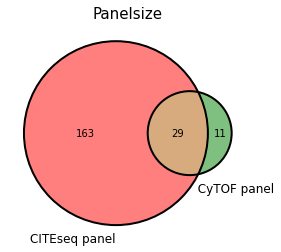

In [32]:
venn2([set(AB_citeseq), set(AB_cytof)],set_labels = ('CITEseq panel', '  CyTOF panel'), alpha = 0.5)
venn2_circles(subsets = (163,11, 29))
plt.title('Panelsize',fontsize = 15)
plt.savefig('06_venn_diagram_panelsize.pdf')

In [10]:
set(AB_cytof)

['CD80',
 'CD86',
 'CD274',
 'PDCD1LG2',
 'ICOSLG',
 'ITGAM',
 'OX40L',
 'TNFSF9',
 'PVR',
 'NECTIN2',
 'CD47',
 'CD70',
 'TNFRSF8',
 'CD40',
 'CD40LG',
 'CD52',
 'CD3',
 'CD8',
 'CD56',
 'CD19',
 'CD33',
 'ITGAX',
 'CD34',
 'TNFRSF17',
 'HLA-ABC',
 'THY1',
 'KIT',
 'MME',
 'CD45RA',
 'CD123',
 'CD7',
 'ITGA6',
 'CCR4',
 'CD4',
 'CD44',
 'CD14',
 'CD16',
 'CD25',
 'CD45RO',
 'PD1',
 'TIGIT',
 'Mouse IgG1_K_Iso',
 'Mouse_IgG2a_K_Iso',
 'Mouse_IgG2b_K_Iso',
 'Rat_IgG2b_K_Iso',
 'CD20',
 'NCR1',
 'PTGDR2',
 'EPCAM',
 'PECAM1',
 'podoplanin',
 'MCAM',
 'CDH1',
 'IgM',
 'CD5',
 'TCRg_d',
 'CXCR3',
 'CCR5',
 'FCGR2A',
 'CCR6',
 'CXCR5',
 'ITGAE',
 'CD69',
 'CD62L',
 'CCR7',
 'CD161',
 'CTLA4',
 'LAG3',
 'KLRG1',
 'CD27',
 'LAMP1',
 'FAS',
 'HLA-DR',
 'CD1C',
 'CD64',
 'CD141',
 'CD1d',
 'KLRK1',
 'CEACAM8',
 'CR1',
 'B3GAT1',
 'HAVCR2',
 'BTLA',
 'ICOS',
 'CD58',
 'CD96',
 'ENTPD1',
 'FASLG',
 'CX3CR1',
 'CD24',
 'CD21',
 'ITGAL',
 'IgA',
 'CD79b',
 'CEACAM1/5/6',
 'CD244',
 'CD235ab',
 'MMR

In [9]:
AB_cytof

['CD45',
 'CD3',
 'CD19',
 'CD15',
 'CD8',
 'TCRgd',
 'CD62L',
 'CD45RO',
 'CD28',
 'CD27',
 'CD226',
 'ICOS',
 'PD1',
 'Lag3',
 'TIGIT',
 'CD96',
 'CD25',
 'CD56',
 'HLADR',
 'CD38',
 'CD137',
 'CD69',
 'Ki67',
 'CXCR3',
 'CXCR5',
 'CCR6',
 'CRTH2',
 'KLRB1',
 'KLRG1',
 'KLRF1',
 'CD95',
 'CD10',
 'CD16',
 'CD34',
 'CD123',
 'CD11c',
 'CD21',
 'CD14',
 'IgD',
 'IgM']